In [135]:
import matplotlib.pyplot as plt
import numpy as np
%pylab inline

execfile('/home/xiaodongli/software/pythonlib/stdA.py')
execfile('/home/xiaodongli/software/pythonlib/bossdatamock.py')
execfile('/home/xiaodongli/software/pythonlib/Tpcftools_smuximu.py')


def meannorm(Y):
    return Y / mean(Y)

def packarray(A, rat):
    As = [A[row::rat] for row in range(rat)]
    #print As
    nowlen =  min([len(X) for X in As])
    B = As[0][:nowlen]
    
    for row in range(1,len(As)):
        B = B + As[row][:nowlen]
    return B
def packarray2d(A, rat):
    As = [A[:,row::rat] for row in range(rat)]
    #print As
    nowlen =  min([len(X[0]) for X in As])
    B = As[0][:,:nowlen]
    
    for row in range(1,len(As)):
        B = B + As[row][:,:nowlen]
    return B
bigmd_redata = np.loadtxt('/home/xiaodongli/data/BigMDPL/Redshifts.csv', delimiter=',')
bigmd_reds = {}
for row in range(len(bigmd_redata)):
    bigmd_reds[int(bigmd_redata[row,0])] = (bigmd_redata[row,3])

Populating the interactive namespace from numpy and matplotlib


In [136]:
def calc_intximu(filename, s_min = 6, s_max = 40, mumax = 0.97, 
                numsbin=150, nummubin=120, mubin_pack_rat = None, 
                omstd=0.3071, wstd=-1.0, omnew=0.3071, wnew = -1.0, z= 0.0):
    data = np.loadtxt(filename)
    norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
    DD, DR, RR = [data[:,row].reshape(150,120) for row in [3,4,6]]
    DD /= norms[0]; DR /= norms[1]; RR /= norms[2]
    
    if omstd == omnew and wstd == wnew:
        pass
    else:
        DAstd, DAnew = DA(omstd, wstd, 0.6777, z), DA(omnew, wnew, 0.6777, z)
        Hstd, Hnew = Hz(omstd, wstd, 0.6777, z), Hz(omnew, wnew, 0.6777, z)
        DD2, DR2, RR2  = [ mapping_smudata_to_another_cosmology_simple(X, DAstd, DAnew, Hstd, Hnew, ) for X in [DD,DR,RR]]
        DD, DR, RR = DD2, DR2, RR2
    
    imumax = int(nummubin*mumax)
    DD, DR, RR = DD[:,:imumax], DR[:,:imumax], RR[:,:imumax]
    if mubin_pack_rat == None:
        pass
    else:
        DD, DR, RR = packarray2d(DD, mubin_pack_rat), packarray2d(DR, mubin_pack_rat), packarray2d(RR, mubin_pack_rat)
    xi = np.divide(DD-2*DR+RR,RR)
    return xi[s_min:s_max+1,:].sum(0)

In [137]:
#def average
for redshift in range(14):     
    for num in range(1,31):
        filename='../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos%02i'%num+'%s'%chr(97+redshift)+\
   '.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        data = np.loadtxt(filename); norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
        DD, DR, RR = [data[:,row].reshape(150,120) for row in [3,4,6]]
        DD /= norms[0]; DR /= norms[1]; RR /= norms[2]
        print data

[[ 4.16666700e-03  5.00000000e-01  2.84272500e+01 ...  3.25566202e-10
   8.90000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  3.05493000e+01 ...  2.85327682e-10
   7.80000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.71433200e+01 ...  2.81669635e-10
   7.70000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -2.94339800e-03 ...  1.13934599e-05
   3.11462900e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -6.85364800e-03 ...  1.15473942e-05
   3.15671000e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -2.99341600e-03 ...  1.17782353e-05
   3.21981500e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  3.01106300e+01 ...  2.61049854e-10
   7.10000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.53688500e+01 ...  3.12524473e-10
   8.50000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.79664900e+01 ...  2.64726613e-10
   7.20000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.6954130

[[ 4.16666700e-03  5.00000000e-01  3.75011600e+01 ...  2.74711690e-10
   7.50000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.87667300e+01 ...  2.45409110e-10
   6.70000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.59234300e+01 ...  2.38083465e-10
   6.50000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.96775900e-03 ...  1.13836642e-05
   3.10789400e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02  1.45068700e-02 ...  1.15402205e-05
   3.15063600e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02  1.17432800e-02 ...  1.18022112e-05
   3.22216300e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.90530200e+01 ...  2.63989907e-10
   7.20000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  3.03419900e+01 ...  2.74989486e-10
   7.50000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.42454800e+01 ...  2.52990327e-10
   6.90000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -5.9319740

[[ 4.16666700e-03  5.00000000e-01  3.23856800e+01 ...  2.27427041e-10
   6.20000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  3.27652600e+01 ...  3.04458780e-10
   8.30000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.51604000e+01 ...  2.42099753e-10
   6.60000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02  3.03779900e-03 ...  1.13569141e-05
   3.09606400e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -3.28415500e-03 ...  1.14869253e-05
   3.13150700e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -1.21470000e-03 ...  1.17372198e-05
   3.19974100e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.92589700e+01 ...  2.85742232e-10
   7.80000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.60029700e+01 ...  2.63762060e-10
   7.20000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.14262100e+01 ...  2.45445251e-10
   6.70000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.6973340

[[ 4.16666700e-03  5.00000000e-01  2.21389700e+01 ...  2.35586349e-10
   6.40000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.33679400e+01 ...  2.94482936e-10
   8.00000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.04071700e+01 ...  2.46629459e-10
   6.70000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -2.83122800e-03 ...  1.14747485e-05
   3.11726000e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02  6.17480900e-03 ...  1.16028890e-05
   3.15207100e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -3.00120000e-03 ...  1.18209205e-05
   3.21130200e+06  1.17050586e-05]]
[[4.16666700e-03 5.00000000e-01 1.55560500e+01 ... 2.90146017e-10
  7.90000000e+01 2.53122460e-10]
 [1.25000000e-02 5.00000000e-01 1.93338100e+01 ... 2.90146017e-10
  7.90000000e+01 2.48681716e-10]
 [2.08333300e-02 5.00000000e-01 2.03975500e+01 ... 2.35055001e-10
  6.40000000e+01 2.68911776e-10]
 ...
 [9.79166700e-01 1.49500000e+02 8.44480900e-03 ... 1.13720895e

[[ 4.16666700e-03  5.00000000e-01  2.82257900e+01 ...  2.16664114e-10
   5.90000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.44339100e+01 ...  2.01975022e-10
   5.50000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.05531900e+01 ...  2.68075938e-10
   7.30000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -2.82723300e-03 ...  1.13451647e-05
   3.08941200e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -6.05728500e-03 ...  1.14975420e-05
   3.13090600e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -1.28984600e-02 ...  1.17320350e-05
   3.19476100e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.32552300e+01 ...  2.42284078e-10
   6.60000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.80161900e+01 ...  2.45955049e-10
   6.70000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  1.93198400e+01 ...  2.67980874e-10
   7.30000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -2.5954440

[[ 4.16666700e-03  5.00000000e-01  1.88892300e+01 ...  2.88020480e-10
   7.70000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.61105300e+01 ...  2.80539429e-10
   7.50000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.10696400e+01 ...  2.50615223e-10
   6.70000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -4.71906900e-03 ...  1.13842900e-05
   3.04350000e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -9.88593700e-03 ...  1.15074169e-05
   3.07641700e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -4.59914400e-03 ...  1.17643087e-05
   3.14509500e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  1.53460200e+01 ...  2.20385675e-10
   5.90000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.11547700e+01 ...  2.65209880e-10
   7.10000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.78250300e+01 ...  2.39062427e-10
   6.40000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -3.7711650

[[ 4.16666700e-03  5.00000000e-01  1.92018600e+01 ...  2.38947377e-10
   6.40000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.71318100e+01 ...  2.53881588e-10
   6.80000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.47179400e+01 ...  2.57615141e-10
   6.90000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -8.42796900e-03 ...  1.13411444e-05
   3.03762800e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -2.47414000e-03 ...  1.15044276e-05
   3.08136200e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02  5.39900300e-04 ...  1.17440097e-05
   3.14553200e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.16286200e+01 ...  2.12753330e-10
   5.70000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.35434700e+01 ...  2.46345962e-10
   6.60000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.44266100e+01 ...  2.94868651e-10
   7.90000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02  3.8594250

[[4.16666700e-03 5.00000000e-01 1.55211000e+01 ... 3.09594785e-10
  8.40000000e+01 2.53122460e-10]
 [1.25000000e-02 5.00000000e-01 1.99158700e+01 ... 2.35881741e-10
  6.40000000e+01 2.48681716e-10]
 [2.08333300e-02 5.00000000e-01 2.11675600e+01 ... 2.61681306e-10
  7.10000000e+01 2.68911776e-10]
 ...
 [9.79166700e-01 1.49500000e+02 6.59554100e-03 ... 1.13960919e-05
  3.09201500e+06 1.13270821e-05]
 [9.87500000e-01 1.49500000e+02 6.84760700e-03 ... 1.15062081e-05
  3.12189200e+06 1.14637781e-05]
 [9.95833300e-01 1.49500000e+02 1.14387500e-02 ... 1.17509022e-05
  3.18828300e+06 1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  1.78751300e+01 ...  3.03236046e-10
   8.20000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.71519600e+01 ...  2.95840045e-10
   8.00000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  1.93031500e+01 ...  2.55162039e-10
   6.90000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.16875900e-02 ...  1.10823345e-05
   2.99684

[[ 4.16666700e-03  5.00000000e-01  1.90761100e+01 ...  2.58686699e-10
   7.00000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  1.72620400e+01 ...  2.47600127e-10
   6.70000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.27629000e+01 ...  2.84555369e-10
   7.70000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -3.18334800e-03 ...  1.14741779e-05
   3.10488500e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -1.40456800e-02 ...  1.16306907e-05
   3.14723700e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -1.41901500e-02 ...  1.18732206e-05
   3.21286500e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.08235100e+01 ...  2.58673221e-10
   7.00000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.70537000e+01 ...  2.47587226e-10
   6.70000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  1.87812600e+01 ...  2.66063884e-10
   7.20000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -5.6492090

[[4.16666700e-03 5.00000000e-01 2.73031400e+01 ... 2.24005370e-10
  6.10000000e+01 2.53122460e-10]
 [1.25000000e-02 5.00000000e-01 1.94760000e+01 ... 2.71744220e-10
  7.40000000e+01 2.48681716e-10]
 [2.08333300e-02 5.00000000e-01 2.29613400e+01 ... 3.26827507e-10
  8.90000000e+01 2.68911776e-10]
 ...
 [9.79166700e-01 1.49500000e+02 1.12883800e-02 ... 1.13824657e-05
  3.09961500e+06 1.13270821e-05]
 [9.87500000e-01 1.49500000e+02 1.62512500e-02 ... 1.15240848e-05
  3.13818000e+06 1.14637781e-05]
 [9.95833300e-01 1.49500000e+02 1.73052900e-02 ... 1.17684379e-05
  3.20472100e+06 1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.60626000e+01 ...  2.90914019e-10
   7.90000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.39762500e+01 ...  2.76184195e-10
   7.50000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.17547800e+01 ...  3.42468402e-10
   9.30000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.58065400e-02 ...  1.13120075e-05
   3.07186

[[ 4.16666700e-03  5.00000000e-01  2.05342800e+01 ...  2.60725647e-10
   7.10000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  1.88884400e+01 ...  2.90103185e-10
   7.90000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  1.73000500e+01 ...  2.68070032e-10
   7.30000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.03008300e-02 ...  1.15526983e-05
   3.14599500e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -7.12558100e-03 ...  1.16936848e-05
   3.18438800e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -1.18813000e-02 ...  1.19488398e-05
   3.25387100e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.08281400e+01 ...  2.75269865e-10
   7.50000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.00160200e+01 ...  2.01864568e-10
   5.50000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.18309200e+01 ...  2.56918541e-10
   7.00000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -7.7399860

[[ 4.16666700e-03  5.00000000e-01  1.87491800e+01 ...  2.80424307e-10
   7.70000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.12056700e+01 ...  2.29438070e-10
   6.30000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.24845100e+01 ...  2.29438070e-10
   6.30000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.85631100e-02 ...  1.09775009e-05
   3.01424500e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -5.29735600e-03 ...  1.11027413e-05
   3.04863400e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -1.98198400e-02 ...  1.13196586e-05
   3.10819600e+06  1.17050586e-05]]
[[4.16666700e-03 5.00000000e-01 2.31858400e+01 ... 2.62468914e-10
  7.20000000e+01 2.53122460e-10]
 [1.25000000e-02 5.00000000e-01 1.76343700e+01 ... 2.47887308e-10
  6.80000000e+01 2.48681716e-10]
 [2.08333300e-02 5.00000000e-01 2.11904000e+01 ... 2.47887308e-10
  6.80000000e+01 2.68911776e-10]
 ...
 [9.79166700e-01 1.49500000e+02 7.42533500e-03 ... 1.13799267e

[[ 4.16666700e-03  5.00000000e-01  1.61327600e+01 ...  2.40667217e-10
   6.60000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.26831900e+01 ...  1.60444811e-10
   4.40000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.02926100e+01 ...  2.62546055e-10
   7.20000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -5.85991100e-03 ...  1.14563977e-05
   3.14177500e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -1.13894600e-03 ...  1.15842138e-05
   3.17682700e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -5.20173800e-03 ...  1.18202865e-05
   3.24156700e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.28070400e+01 ...  2.52256584e-10
   6.80000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.29566800e+01 ...  2.26288994e-10
   6.10000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  1.57736900e+01 ...  2.44837272e-10
   6.60000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -5.9433240

[[4.16666700e-03 5.00000000e-01 1.80596500e+01 ... 2.85047412e-10
  7.70000000e+01 2.53122460e-10]
 [1.25000000e-02 5.00000000e-01 1.73517100e+01 ... 2.99855070e-10
  8.10000000e+01 2.48681716e-10]
 [2.08333300e-02 5.00000000e-01 2.43014100e+01 ... 1.99903380e-10
  5.40000000e+01 2.68911776e-10]
 ...
 [9.79166700e-01 1.49500000e+02 1.19820200e-02 ... 1.13447908e-05
  3.06457400e+06 1.13270821e-05]
 [9.87500000e-01 1.49500000e+02 5.23217200e-03 ... 1.14837273e-05
  3.10210500e+06 1.14637781e-05]
 [9.95833300e-01 1.49500000e+02 6.44426600e-03 ... 1.17225711e-05
  3.16662400e+06 1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.52006000e+01 ...  1.95635700e-10
   5.30000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.52182700e+01 ...  1.91944460e-10
   5.20000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  1.76711200e+01 ...  2.98990409e-10
   8.10000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -6.04551700e-03 ...  1.12069505e-05
   3.03609

[[4.16666700e-03 5.00000000e-01 2.64245700e+01 ... 2.81326648e-10
  7.60000000e+01 2.53122460e-10]
 [1.25000000e-02 5.00000000e-01 2.20245900e+01 ... 2.73923315e-10
  7.40000000e+01 2.48681716e-10]
 [2.08333300e-02 5.00000000e-01 2.12689700e+01 ... 2.18398319e-10
  5.90000000e+01 2.68911776e-10]
 ...
 [9.79166700e-01 1.49500000e+02 1.42901300e-02 ... 1.13458889e-05
  3.06507600e+06 1.13270821e-05]
 [9.87500000e-01 1.49500000e+02 1.51842200e-02 ... 1.14743404e-05
  3.09977700e+06 1.14637781e-05]
 [9.95833300e-01 1.49500000e+02 7.61035000e-03 ... 1.17317284e-05
  3.16931000e+06 1.17050586e-05]]
[[4.16666700e-03 5.00000000e-01 2.06461300e+01 ... 1.66156443e-10
  4.50000000e+01 2.53122460e-10]
 [1.25000000e-02 5.00000000e-01 2.60610200e+01 ... 3.10158694e-10
  8.40000000e+01 2.48681716e-10]
 [2.08333300e-02 5.00000000e-01 2.78198400e+01 ... 3.17543425e-10
  8.60000000e+01 2.68911776e-10]
 ...
 [9.79166700e-01 1.49500000e+02 1.11374900e-02 ... 1.12827056e-05
  3.05568500e+06 1.13270821e-05]

[[ 4.16666700e-03  5.00000000e-01  2.19877200e+01 ...  2.43440313e-10
   6.50000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.80604900e+01 ...  2.17223664e-10
   5.80000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.49840400e+01 ...  2.43440313e-10
   6.50000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02  7.39022800e-03 ...  1.14598029e-05
   3.05983500e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -1.79847400e-03 ...  1.15924817e-05
   3.09526100e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -2.14189200e-03 ...  1.18151884e-05
   3.15472500e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.15636200e+01 ...  2.35763179e-10
   6.30000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.00495600e+01 ...  2.99381814e-10
   8.00000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  1.41115100e+01 ...  2.80670451e-10
   7.50000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02  1.0240880

[[ 4.16666700e-03  5.00000000e-01  1.84771800e+01 ...  2.24320030e-10
   6.00000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  1.95201900e+01 ...  2.46752033e-10
   6.60000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.05439800e+01 ...  2.61706702e-10
   7.00000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02  2.07095300e-03 ...  1.13959847e-05
   3.04814100e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -1.69570400e-02 ...  1.15449855e-05
   3.08799500e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -2.06994400e-02 ...  1.17928031e-05
   3.15428000e+06  1.17050586e-05]]
[[4.16666700e-03 5.00000000e-01 2.24636200e+01 ... 2.61902838e-10
  7.10000000e+01 2.53122460e-10]
 [1.25000000e-02 5.00000000e-01 2.51227000e+01 ... 3.09856879e-10
  8.40000000e+01 2.48681716e-10]
 [2.08333300e-02 5.00000000e-01 2.22707000e+01 ... 2.28703887e-10
  6.20000000e+01 2.68911776e-10]
 ...
 [9.79166700e-01 1.49500000e+02 1.43009100e-02 ... 1.13538422e

[[ 4.16666700e-03  5.00000000e-01  2.57121400e+01 ...  2.83690034e-10
   7.70000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.62146500e+01 ...  2.21057169e-10
   6.00000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.72918500e+01 ...  2.06320024e-10
   5.60000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.84671600e-02 ...  1.14600863e-05
   3.11053100e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -1.46649600e-02 ...  1.15907090e-05
   3.14598500e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -3.71031300e-03 ...  1.18247975e-05
   3.20952200e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  1.81417900e+01 ...  2.42725320e-10
   6.60000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.95889200e+01 ...  2.28014694e-10
   6.20000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.59961600e+01 ...  2.57435945e-10
   7.00000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02  3.3218860

[[4.16666700e-03 5.00000000e-01 2.24788400e+01 ... 2.42754067e-10
  6.60000000e+01 2.53122460e-10]
 [1.25000000e-02 5.00000000e-01 2.17114400e+01 ... 3.31028273e-10
  9.00000000e+01 2.48681716e-10]
 [2.08333300e-02 5.00000000e-01 2.33364500e+01 ... 2.86891170e-10
  7.80000000e+01 2.68911776e-10]
 ...
 [9.79166700e-01 1.49500000e+02 2.64296200e-03 ... 1.12346545e-05
  3.05447900e+06 1.13270821e-05]
 [9.87500000e-01 1.49500000e+02 5.19019800e-03 ... 1.13999222e-05
  3.09941200e+06 1.14637781e-05]
 [9.95833300e-01 1.49500000e+02 3.99964500e-03 ... 1.16675034e-05
  3.17216200e+06 1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.60595000e+01 ...  3.08879619e-10
   8.30000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  1.94031900e+01 ...  2.93993854e-10
   7.90000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.00485700e+01 ...  2.45615119e-10
   6.60000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -8.90441200e-04 ...  1.14096261e-05
   3.06591

[[ 4.16666700e-03  5.00000000e-01  2.14884100e+01 ...  2.26772216e-10
   6.20000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.32163300e+01 ...  2.74321229e-10
   7.50000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.31629800e+01 ...  2.19456983e-10
   6.00000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.74308300e-03 ...  1.14592280e-05
   3.13297700e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02  3.07806000e-03 ...  1.15862278e-05
   3.16769900e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -3.41657100e-03 ...  1.18113687e-05
   3.22925300e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.74903500e+01 ...  2.51503380e-10
   6.80000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.22554100e+01 ...  2.40407643e-10
   6.50000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  1.96938400e+01 ...  3.14379225e-10
   8.50000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.1528280

[[4.16666700e-03 5.00000000e-01 2.72754600e+01 ... 3.09638493e-10
  8.40000000e+01 2.53122460e-10]
 [1.25000000e-02 5.00000000e-01 2.36429700e+01 ... 2.13798007e-10
  5.80000000e+01 2.48681716e-10]
 [2.08333300e-02 5.00000000e-01 2.90919600e+01 ... 2.98579976e-10
  8.10000000e+01 2.68911776e-10]
 ...
 [9.79166700e-01 1.49500000e+02 1.19013300e-02 ... 1.13710313e-05
  3.08478000e+06 1.13270821e-05]
 [9.87500000e-01 1.49500000e+02 1.60526900e-02 ... 1.15107152e-05
  3.12267400e+06 1.14637781e-05]
 [9.95833300e-01 1.49500000e+02 2.24925500e-02 ... 1.17329471e-05
  3.18296200e+06 1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.80435200e+01 ...  2.25252671e-10
   6.10000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.20359400e+01 ...  2.58486671e-10
   7.00000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.10284000e+01 ...  2.91720672e-10
   7.90000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -4.47739000e-03 ...  1.13974934e-05
   3.08652

[[ 4.16666700e-03  5.00000000e-01  2.47811200e+01 ...  2.91039091e-10
   7.90000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.17255200e+01 ...  2.83671012e-10
   7.70000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.34140400e+01 ...  2.32094465e-10
   6.30000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -6.60706500e-03 ...  1.13123284e-05
   3.07063200e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -1.09620000e-02 ...  1.14690253e-05
   3.11316600e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -6.68598200e-04 ...  1.17065685e-05
   3.17764500e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.61333000e+01 ...  2.57299954e-10
   6.90000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.34989600e+01 ...  2.46112999e-10
   6.60000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.15535800e+01 ...  2.23739090e-10
   6.00000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -2.5437960

[[ 4.16666700e-03  5.00000000e-01  2.52083300e+01 ...  2.41654643e-10
   6.50000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.72315500e+01 ...  2.11912533e-10
   5.70000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.38145700e+01 ...  2.37936879e-10
   6.40000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -4.18893600e-03 ...  1.14941692e-05
   3.09168900e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -1.16701200e-02 ...  1.16472556e-05
   3.13286600e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -1.08268500e-02 ...  1.18594433e-05
   3.18994000e+06  1.17050586e-05]]
[[4.16666700e-03 5.00000000e-01 2.11424600e+01 ... 2.85117496e-10
  7.70000000e+01 2.53122460e-10]
 [1.25000000e-02 5.00000000e-01 2.20384500e+01 ... 2.74009022e-10
  7.40000000e+01 2.48681716e-10]
 [2.08333300e-02 5.00000000e-01 2.89976800e+01 ... 1.81438407e-10
  4.90000000e+01 2.68911776e-10]
 ...
 [9.79166700e-01 1.49500000e+02 3.53760800e-03 ... 1.13820497e

[[ 4.16666700e-03  5.00000000e-01  2.60670300e+01 ...  2.22323668e-10
   6.00000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.47844900e+01 ...  2.70493796e-10
   7.30000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.07597500e+01 ...  2.37145246e-10
   6.40000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.75003100e-03 ...  1.11384713e-05
   3.00601500e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02  7.40048900e-03 ...  1.12664075e-05
   3.04054200e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02  7.84565500e-03 ...  1.14980836e-05
   3.10306600e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.43195800e+01 ...  2.93494599e-10
   7.90000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.89945900e+01 ...  2.67488749e-10
   7.20000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.84407800e+01 ...  2.26622412e-10
   6.10000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -8.4486110

[[ 4.16666700e-03  5.00000000e-01  2.34973700e+01 ...  2.30361668e-10
   6.20000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.28795200e+01 ...  2.45223711e-10
   6.60000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.43971500e+01 ...  2.67516776e-10
   7.20000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.04609600e-02 ...  1.13297702e-05
   3.04931700e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -5.47631000e-03 ...  1.14646618e-05
   3.08562200e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02  2.67437600e-03 ...  1.16858201e-05
   3.14514500e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.17660000e+01 ...  2.01784749e-10
   5.40000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  3.17559900e+01 ...  1.94311240e-10
   5.20000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.40017600e+01 ...  2.46625804e-10
   6.60000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.6808070

[[ 4.16666700e-03  5.00000000e-01  2.00881200e+01 ...  2.87777747e-10
   7.80000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.75895600e+01 ...  2.25056956e-10
   6.10000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.75038400e+01 ...  2.43504247e-10
   6.60000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.07260300e-02 ...  1.15434701e-05
   3.12877100e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -1.24561400e-02 ...  1.17102521e-05
   3.17397600e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02  3.23967200e-03 ...  1.19470563e-05
   3.23816000e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  3.12065100e+01 ...  1.86629978e-10
   5.00000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.19079200e+01 ...  2.23955973e-10
   6.00000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.03386300e+01 ...  2.79944967e-10
   7.50000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -7.7479850

[[ 4.16666700e-03  5.00000000e-01  2.81563500e+01 ...  2.65858162e-10
   7.20000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.67446300e+01 ...  2.80628060e-10
   7.60000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.86994000e+01 ...  2.54780739e-10
   6.90000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.38149100e-02 ...  1.13265953e-05
   3.06748100e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -2.35440900e-02 ...  1.14844818e-05
   3.11024000e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -2.67185300e-02 ...  1.17367406e-05
   3.17855700e+06  1.17050586e-05]]
[[4.16666700e-03 5.00000000e-01 2.28727600e+01 ... 3.24015347e-10
  8.70000000e+01 2.53122460e-10]
 [1.25000000e-02 5.00000000e-01 2.91985400e+01 ... 2.60702003e-10
  7.00000000e+01 2.48681716e-10]
 [2.08333300e-02 5.00000000e-01 2.75784300e+01 ... 2.49529060e-10
  6.70000000e+01 2.68911776e-10]
 ...
 [9.79166700e-01 1.49500000e+02 1.24465700e-02 ... 1.13906366e

[[ 4.16666700e-03  5.00000000e-01  3.02470500e+01 ...  2.34649456e-10
   6.30000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  3.19762500e+01 ...  2.53272429e-10
   6.80000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.45969600e+01 ...  2.01128105e-10
   5.40000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.16848000e-02 ...  1.15716448e-05
   3.10682000e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -1.25621500e-02 ...  1.17197645e-05
   3.14658800e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02 -1.60139000e-02 ...  1.19650812e-05
   3.21245200e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.77752900e+01 ...  2.31614307e-10
   6.20000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.84379600e+01 ...  2.65235739e-10
   7.10000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  1.63044400e+01 ...  2.61500024e-10
   7.00000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.2944360

[[ 4.16666700e-03  5.00000000e-01  3.67129300e+01 ...  2.34015967e-10
   6.30000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  3.04244700e+01 ...  2.56303201e-10
   6.90000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.72960900e+01 ...  2.67446819e-10
   7.20000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -1.52305500e-03 ...  1.11993727e-05
   3.01501000e+06  1.13270821e-05]
 [ 9.87500000e-01  1.49500000e+02 -1.24331800e-02 ...  1.13417138e-05
   3.05333000e+06  1.14637781e-05]
 [ 9.95833300e-01  1.49500000e+02  3.07885600e-03 ...  1.15716141e-05
   3.11522200e+06  1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.37152800e+01 ...  2.12104625e-10
   5.70000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  2.88767700e+01 ...  2.38152561e-10
   6.40000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  2.42196500e+01 ...  2.45594829e-10
   6.60000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -9.8608360

[[4.16666700e-03 5.00000000e-01 2.74334700e+01 ... 2.22516191e-10
  6.00000000e+01 2.53122460e-10]
 [1.25000000e-02 5.00000000e-01 1.94472700e+01 ... 2.70728032e-10
  7.30000000e+01 2.48681716e-10]
 [2.08333300e-02 5.00000000e-01 3.05820600e+01 ... 3.15231270e-10
  8.50000000e+01 2.68911776e-10]
 ...
 [9.79166700e-01 1.49500000e+02 9.52472600e-03 ... 1.12705674e-05
  3.03903300e+06 1.13270821e-05]
 [9.87500000e-01 1.49500000e+02 7.04137500e-03 ... 1.13950356e-05
  3.07259500e+06 1.14637781e-05]
 [9.95833300e-01 1.49500000e+02 2.78923000e-02 ... 1.16347486e-05
  3.13723200e+06 1.17050586e-05]]
[[ 4.16666700e-03  5.00000000e-01  2.05623500e+01 ...  2.71500415e-10
   7.30000000e+01  2.53122460e-10]
 [ 1.25000000e-02  5.00000000e-01  3.12529800e+01 ...  2.75219599e-10
   7.40000000e+01  2.48681716e-10]
 [ 2.08333300e-02  5.00000000e-01  3.29236900e+01 ...  2.49185313e-10
   6.70000000e+01  2.68911776e-10]
 ...
 [ 9.79166700e-01  1.49500000e+02 -5.96448900e-03 ...  1.14451930e-05
   3.07734

In [155]:
def drawximu(nowid=None, filename=None, fig=None, ax1=None, ax2=None, ax3=None, ax4=None,\
             ax5=None, ax6=None, mubin_pack_rat = 1, mumax=0.97, color=None,
            omstd=0.3071, wstd=-1.0, omnew=0.3071, wnew = -1.0, z=0.0, zsma=0.0,
            only_plot_nbody=False):
    
    numsbin=150; nummubin=120;
    
    s_min=6; s_max=40
    
    c = '%s'%chr(color)
    cita_to_bigmd_snapid = {15:79, 14: 75, 13:58, 12:48, 11:41,10:33, 9:26, 8:15, 7:12, 6:11, 5:10}
    if fig == None:
        fig, [[ax1, ax3, ax5], [ax2, ax4, ax6]] = plt.subplots(2, 3, figsize=(24,12))
        
    if filename == None:
        filename_bigmd = '/home/xiaodongli/projects/cf_pks/BigMD_2pcfs/snaps/'+str(cita_to_bigmd_snapid[snpid])+\
        '_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        
        filename_cola = '../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_snap%02i'%cita_to_bigmd_snapid[snpid]+\
        '.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        
        filename_bigmd_sma = '/home/xiaodongli/projects/cf_pks/BigMD_2pcfs/snaps/'+str(cita_to_bigmd_snapid[snpid+1])+\
        '_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'
        
        filename_cola_sma = '../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_snap%02i'%cita_to_bigmd_snapid[snpid+1]+\
        '.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'
    
    filename_bigmd_79 = '/home/xiaodongli/projects/cf_pks/BigMD_2pcfs/snaps/'+str(cita_to_bigmd_snapid[15])+\
        '_nbar1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'
    filename_cola_79 = '../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_snap79'\
        '.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'

    filenames = [filename_bigmd, filename_bigmd_sma, filename_cola, filename_cola_sma, filename_bigmd_79, filename_cola_79]

#    intximu_cita, intximu_cita_sma, intximu_cola, intximu_cola_sma, intximu_cita_14, intximu_cola_14 = \
    zs = [z,zsma, z, zsma, 0.1, 0.1]
    #print zs
    intximus = [calc_intximu(filenames[row], s_min = s_min, s_max = s_max, mumax = mumax, mubin_pack_rat=mubin_pack_rat,
                            omstd=omstd, wstd=wstd, omnew=omnew, wnew = wnew, z=zs[row])
                    for row in range(len(filenames))]
    
    imumax = int(nummubin*mumax)
    Y_bigmd, Y_bigmd_sma, Y_cola, Y_cola_sma, Y_bigmd_79, Y_cola_79 = [meannorm(intximu) for intximu in intximus]
    mu = np.loadtxt(filenames[0])[:,0]; X = np.ones(nummubin) - mu[:nummubin]; X = X[:imumax]; 
    X = np.divide(packarray(X, mubin_pack_rat), float(mubin_pack_rat))

    
    error=list(map(lambda x: x[0]-x[1], zip(Y_cola,Y_bigmd)))
    #cita_dxidz = list(array(list(map(lambda x: x[0]-x[1], zip(Y_cita,Y_cita_sma))))/0.1)
    #cola_dxidz = list(array(list(map(lambda x: x[0]-x[1], zip(Y_cola,Y_cola_sma))))/0.1)
    bigmd_dxidz = array(list(map(lambda x: x[0]-x[1], zip(Y_bigmd,Y_bigmd_sma))))/0.1
    cola_dxidz = array(list(map(lambda x: x[0]-x[1], zip(Y_cola,Y_cola_sma))))/0.1
    
    # X, Y for plot
    ax1.plot(X,Y_bigmd, color = c,label='bigmd'+' z= '+str((15-snpid)*0.1))
    ax1.plot(X,Y_cola, color = c,linestyle=':',label='cola'+' z= '+str((15-snpid)*0.1))
    #ax1.plot(X,intximu_cita[:imumax], label='cita'+' z= '+str((15-nowid)*0.1))
    #ax1.plot(X,intximu_cola[:imumax], linestyle='dashed',label='cola'+' z= '+str((15-nowid)*0.1))
    ax1.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$', fontsize=20)
        

    label_err='cola-bigmd'+' z= '+str((15-snpid)*0.1)
    nowfit = polyfit(X,error,1)
    Y = polyval(nowfit,X)
    ax2.plot(X,error, color = c, label = label_err)
    ax2.plot(X,Y, ls='--', color = c,label = '1or cola-bigmd'+' z= '+str((15-nowid)*0.1))
    ax2.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$(cola-bigmd)',fontsize=20)
        
    
    label_z='z= '+str((15-nowid)*0.1)+'- z = 0.1'
    ax3.plot(X, Y_bigmd-Y_bigmd_79, color = c, label = 'bigmd ' +label_z)
    ax3.plot(X, Y_cola-Y_cola_79, color = c, ls=':', label = 'cola ' + label_z)
    ax3.set_ylabel(r'$\hat \xi_{\Delta s}(\mu) - \hat \xi_{\Delta s}(\mu, z=0.1)$', fontsize=20)
        
 
    label_h='z= '+str((15-snpid)*0.1)+'- z = 0.1'
    ax4.plot(X,(Y_cola-Y_cola_79)-(Y_bigmd-Y_bigmd_79), color = c, label = label_h)
    ax4.set_ylabel(r'$\xi_{\Delta s}(\mu,z)$(cola-cita)', fontsize=20)
        

    label_ci=' z = '+str((15-snpid)*0.1)+'-'+'z = '+str((14-snpid)*0.1)
    ax5.plot(X,bigmd_dxidz, color = c, label = 'bigmd '+label_ci)
    ax5.plot(X,cola_dxidz, color = c, ls=':',label = 'cola '+ label_ci)
    ax5.set_ylabel(r'$d\xi_{\Delta s}(\mu)/dz$',fontsize=20)
        
    ax6.plot(X,cola_dxidz-bigmd_dxidz, color = c, label = 'cola-bigmd '+ label_ci)
    #ax6.plot(X,np.array(cola_dxidz)-np.array(cita_dxidz))
    ax6.set_ylabel(r'$d\xi_{\Delta s}(\mu)/dz$(cola-bigmd)',fontsize=20)
   
    
    for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
        ax.grid(ls='--') 
        ax.set_xlabel('$1-\mu$', fontsize=18) 
        ax.legend(fontsize=14, frameon=False)
    return fig, ax1, ax2, ax3, ax4, ax5, ax6, z

ZeroDivisionError: float division by zero

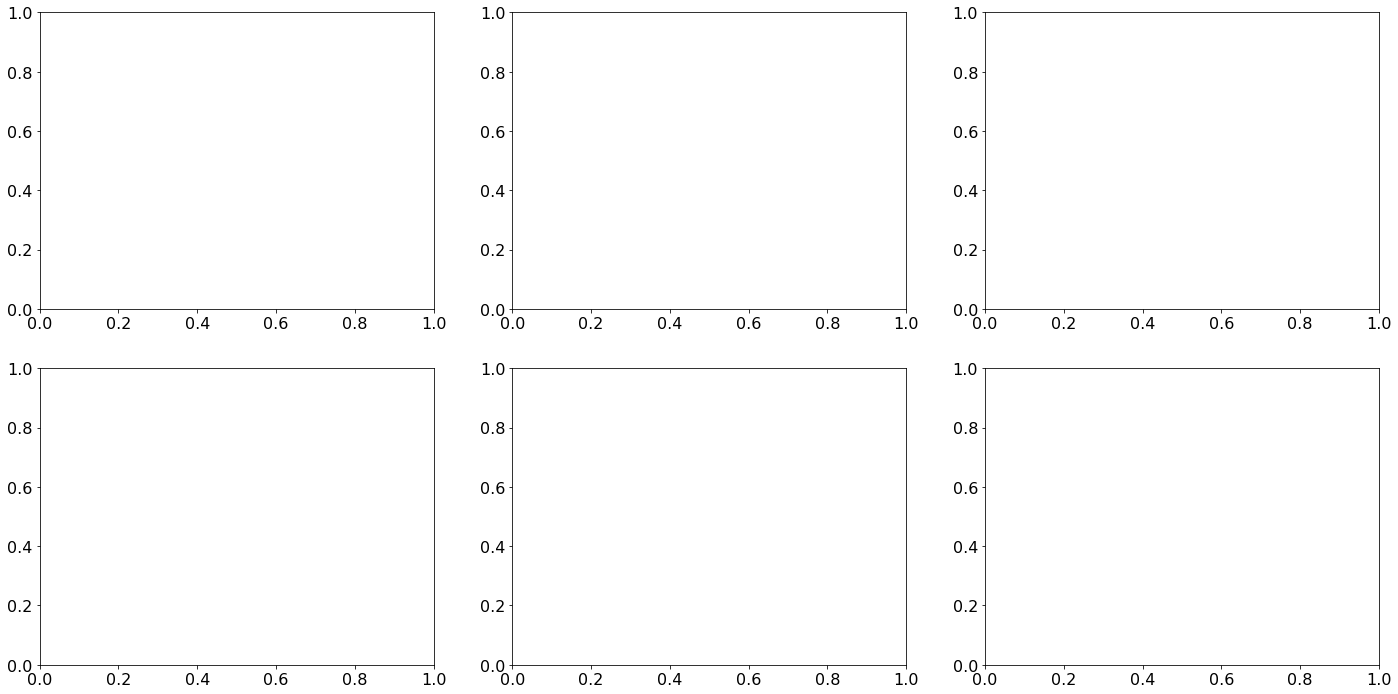

In [159]:
filename =fig = ax1 = ax2 = ax3 = ax4 = ax5 = ax6 = None
zsma = 0.1
for snpid,color,z in [[14,114,0.],[10,121,0.5],[6,98,1.0],[5,103,1.5]]:
#for nowid in [14,10,5,0]:
    fig, ax1, ax2, ax3, ax4, ax5, ax6, zsma=drawximu(nowid, filename, fig, ax1, ax2, ax3, ax4, ax5, ax6,
                                               mubin_pack_rat=8, mumax=0.97,color=color,
                                                      omstd=0.3071, wstd=-1.0, omnew=1, wnew = -1, z=z,zsma=zsma)
                                              # omstd=0.3071, wstd=-1.0, omnew=0.3071, wnew = -2.5, z=z,zsma=zsma)
                                               #omstd=0.3071, wstd=-1.0, omnew=0.3070, wnew = -1.0, z=0.1)

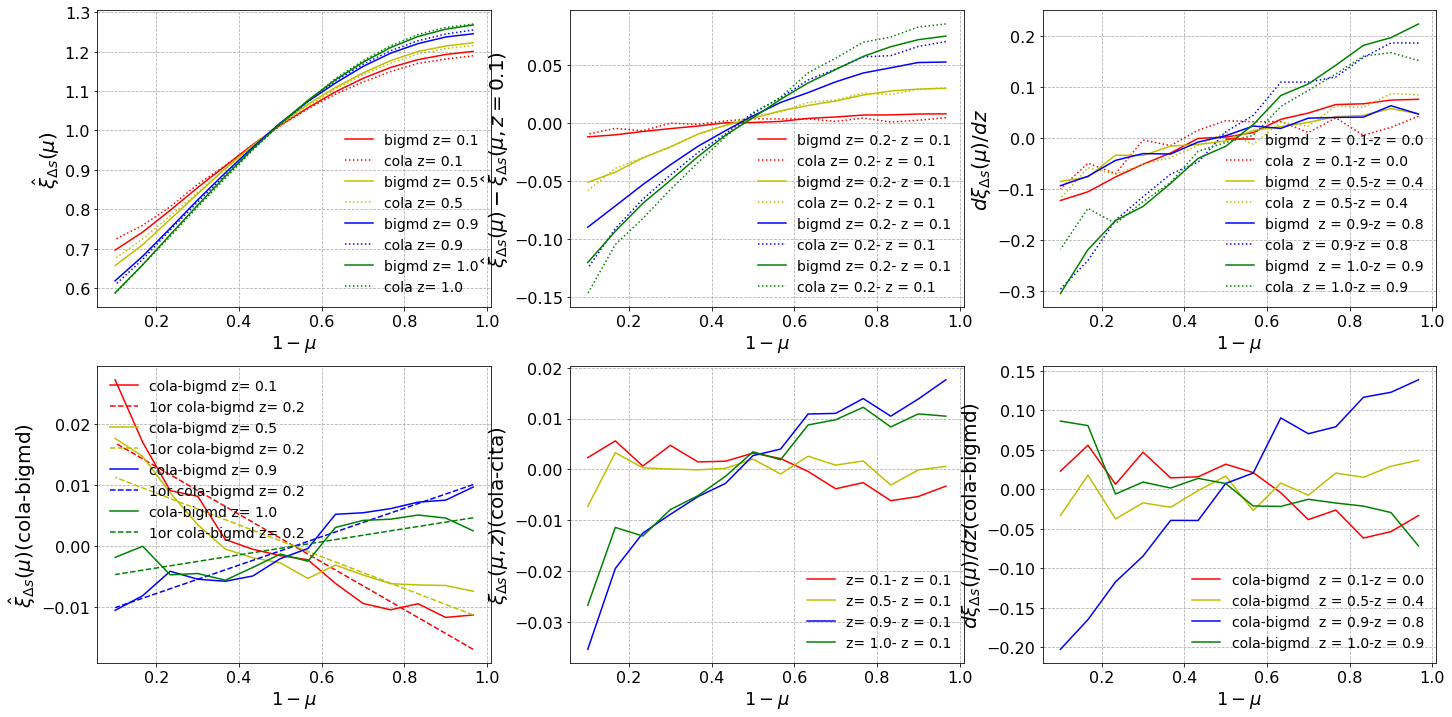

In [157]:
filename =fig = ax1 = ax2 = ax3 = ax4 = ax5 = ax6 = None
zsma = 0.1
for snpid,color,z in [[14,114,0.],[10,121,0.5],[6,98,1.0],[5,103,1.5]]:
#for nowid in [14,10,5,0]:
    fig, ax1, ax2, ax3, ax4, ax5, ax6, zsma=drawximu(nowid, filename, fig, ax1, ax2, ax3, ax4, ax5, ax6,
                                               mubin_pack_rat=8, mumax=0.97,color=color)

In [154]:
for nowid, snpid in [[0, 7],[1,8],[2,9],[3,10],[4,11],[5,12],[6,15],\
                     [7,26],[8,33],[9,41],[10,48],[11,58],[12,75],[13,79]]: 
    outputfile = '../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_snap%02i'%snpid+\
   '.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf'

# names of the 30 files
    files = ['../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos%02i'%num+'%s'%chr(97+nowid)+\
   '.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf' for num in range(1,31)]

# average 
    outputf = open(outputfile, 'w')
   
    DD_ave = np.zeros(18000).reshape(-1, 1); DR_ave = np.zeros(18000).reshape(-1, 1); 
    
    norms_ave = np.zeros((3)); xi_ave = np.zeros(18000).reshape(-1, 1)
    
    for nowfile in files:
        data = np.loadtxt(nowfile)
        norms = np.array([float(xx) for xx in open(nowfile, 'r').readline().split()[1:4]])
        xi, DD, DR = [data[:,row].reshape(-1, 1) for row in [2,3,4]]
        DD_ave += DD/30; DR_ave += DR/30; RD_ave = DR_ave; norms_ave += norms/30; xi_ave += xi/30
        
        #print 'Processing', nowfile, '...'
    
    
    mu, s, RR = [data[:,row].reshape(-1, 1) for row in [0,1,6]]    
    #DD_ave /= norms_ave[0]; DR_ave /= norms_ave[1]; RR /= norms_ave[2] 
    arr = np.hstack((mu,s,xi,DD_ave,DR_ave,DR_ave,RR))
    bins=len(arr)
    normstr = ''
    normfactors='#norms_ave_factors: '
    for val in norms_ave: normstr += (str(val)+' ')
    outputf.write(normfactors+normstr+'\n')
    for i in range(bins):
        X = arr[i,:]
        nowstr = ''
        for val in X: nowstr += (str(val)+' ')
        outputf.write(nowstr+'\n')
    #np.savetxt('cola_BigMD_rockstar_halos_snap%02i'%snpid+\
            #'.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf',arr) 
    print 'Processing', outputfile, '...'
    outputf.close()

Processing ../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_snap07.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf ...
Processing ../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_snap08.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf ...
Processing ../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_snap09.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf ...
Processing ../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_snap10.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf ...
Processing ../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_snap11.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf ...
Processing ../cola_2pcfs/cola_output_600par_512box_BigMD/cola_BigMD_rockstar_halos_snap12.nbar-1e-3.shiftr.om0.3071_w-1.0000.radeczw.150s0to150.120mu.2pcf ...
Processing ../cola_2pcfs/cola_output_600par_51